In [3]:
import sys
agrs = sys.argv
from functools import partial
import pandas as pd
import numpy as np
import os
import xgboost

from new_plot import *
set_things()

# Histogram

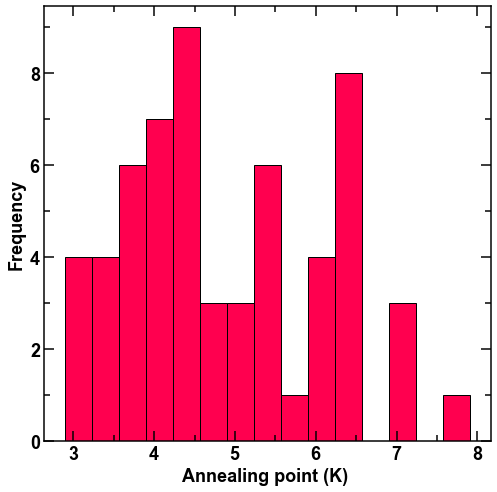

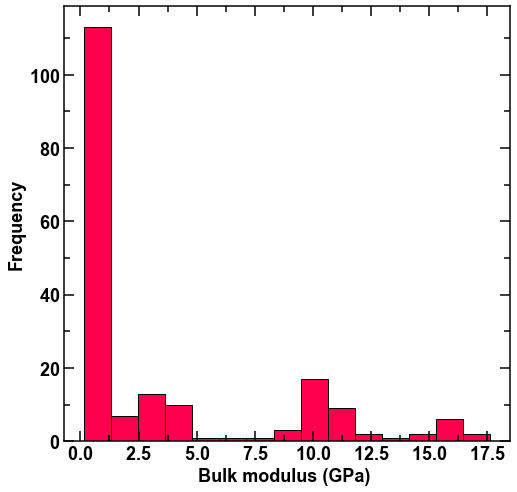

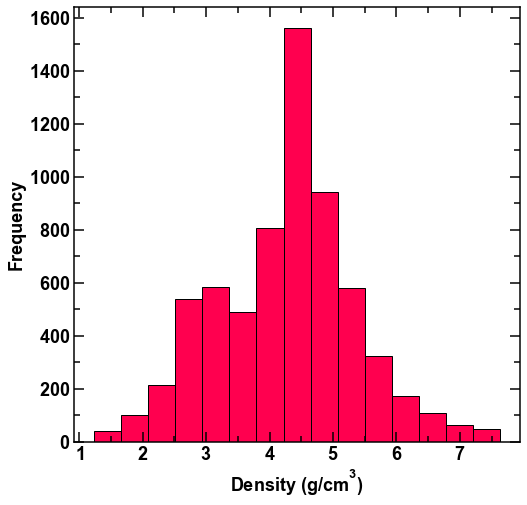

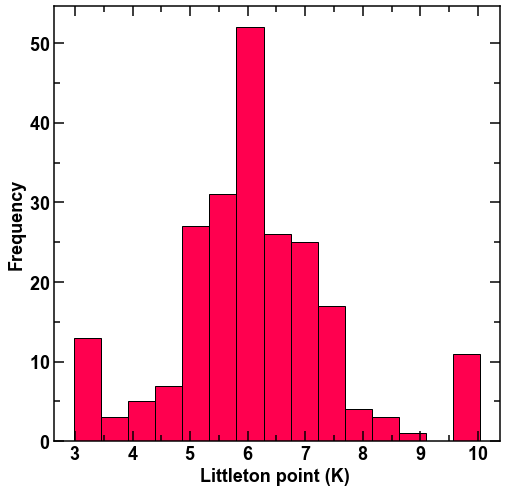

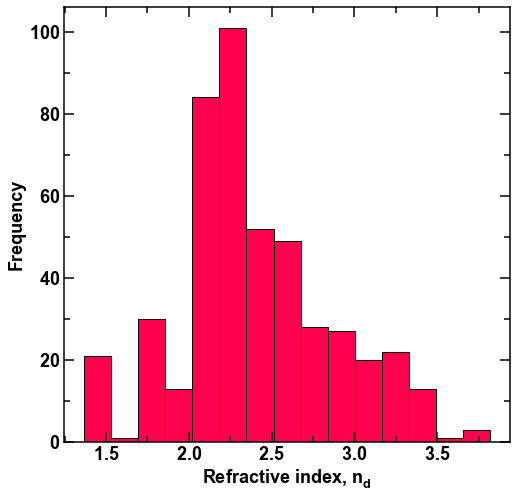

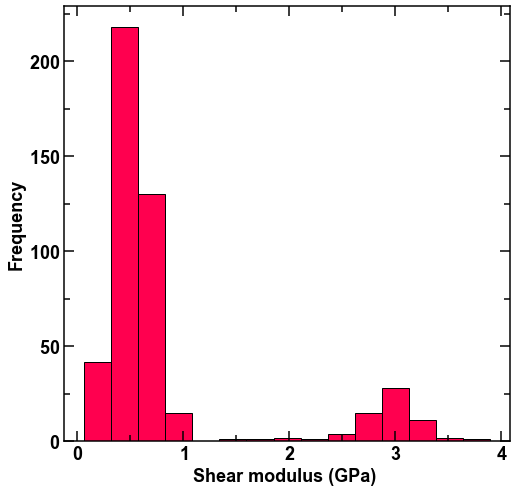

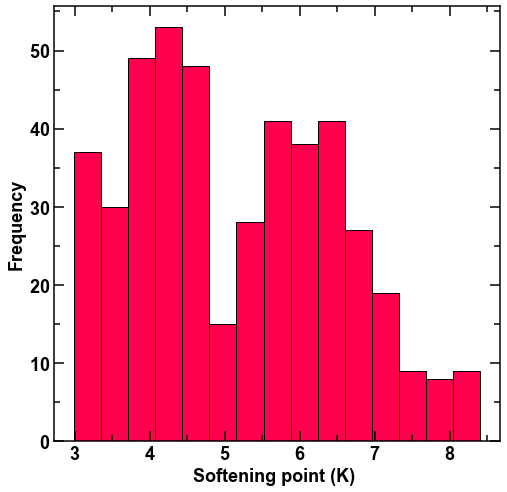

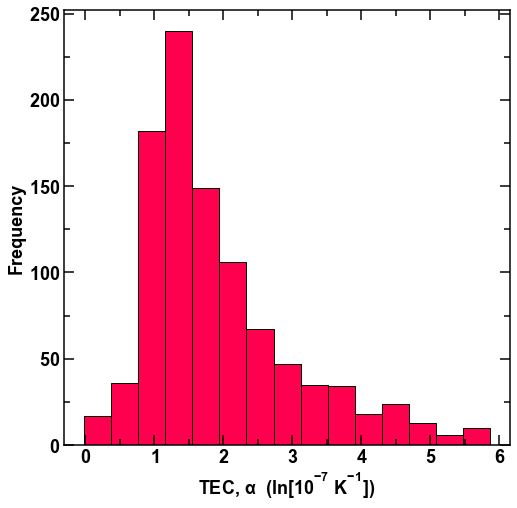

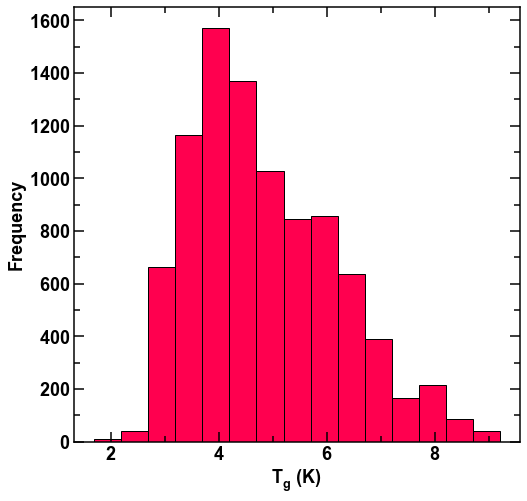

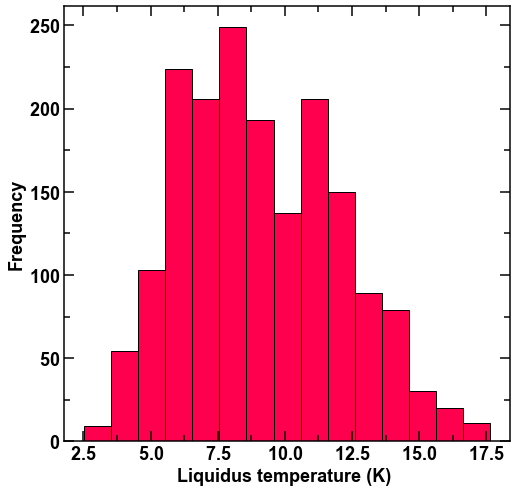

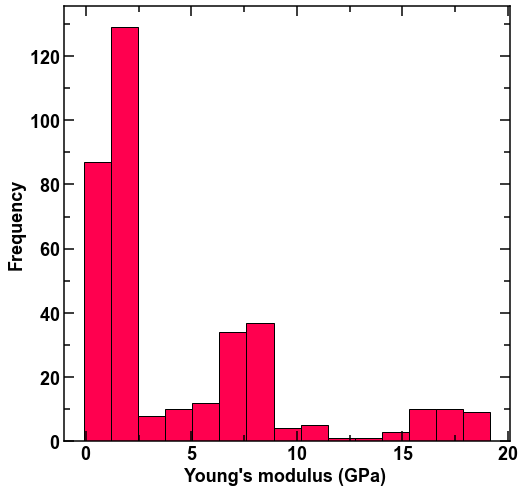

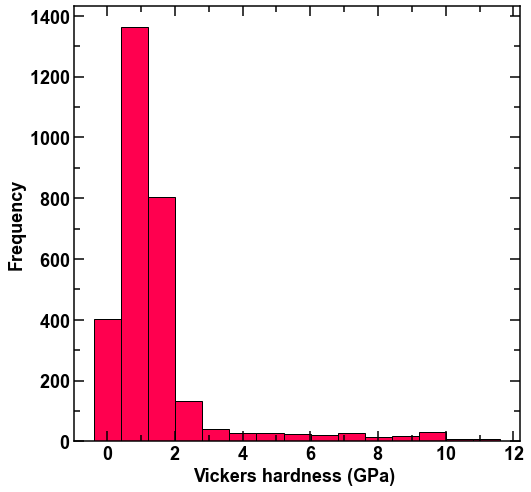

In [4]:
b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

 
path = r'new_data/'

for prop in b: 
    
    
    
    file = path + prop + '.csv'
    data = pd.read_csv(file) 
    
    
    data = data.values
    X_features = data[:,0:-1]
    Y_properties = data[:,-1]

    mean = Y_properties.mean()
    scale = 10**int(np.log10(mean))
    Y_properties /= scale
    mean = Y_properties.mean()
    std = Y_properties.std()
    Zs = (Y_properties-mean)/std
    mask = (Zs<3) & (Zs>-3)

    X_features = X_features[mask.ravel(),:]
    Y_properties = Y_properties[mask].ravel()
    data = Y_properties
    i = prop
    if i == 'annealing':
        lab = "Annealing point (K) " 

    if i == 'BulkModulus':
        lab = "Bulk modulus (GPa) "
    if i == 'Density':
        lab = "Density (g/cm$^3$) "
    if i == 'Hardness_RT' or i == 'Hardness_misc':
        lab ="Vickers hardness (GPa) "
  
    if i== 'shear_modulus':
        lab = "Shear modulus (GPa) "
    if i== 'softening':
        lab = "Softening point (K) "
    if i== 'TLiq':
        lab = "Liquidus temperature (K) "
    if i == 'Littleton':
        lab = "Littleton point (K) "
    if i == 'TG':
        lab = "$T_g$ (K) "
    if i== 'TEC':
        lab ="TEC, \u03B1  (ln[$10^{-7}$ $K^{-1}$]) "
    if i== 'YM':
        lab = "Young's modulus (GPa) "
    if i== 'ND':
        lab =  "Refractive index, $n_d$ "
 
    plt.figure(figsize=(8,8))
#     data = np.array(data[prop])
    plt.hist(data, align='left', bins = 15, color= "#FF004F", edgecolor='black',
                  linewidth=1)


    # Add axis labels
    plt.xlabel(lab, fontsize = 18)
    plt.ylabel("Frequency", fontsize = 18)
    

#     plt.minorticks_off()
    #ax.tick_params(axis="x",which='major', width=2)
    #plt.title("Example of Histogram Plot")
    #plt.savefig('Hist.png')
#     plt.savefig("histogram/" + prop + ".png", dpi=300)
    plt.show()

# Element Frequency 

In [9]:

file = path + "TG" + '.csv'
data = pd.read_csv(file) 
ff = pd.DataFrame(data.astype(bool).sum(axis=0).sort_values(ascending=False))
col_global = data.columns[:-1]

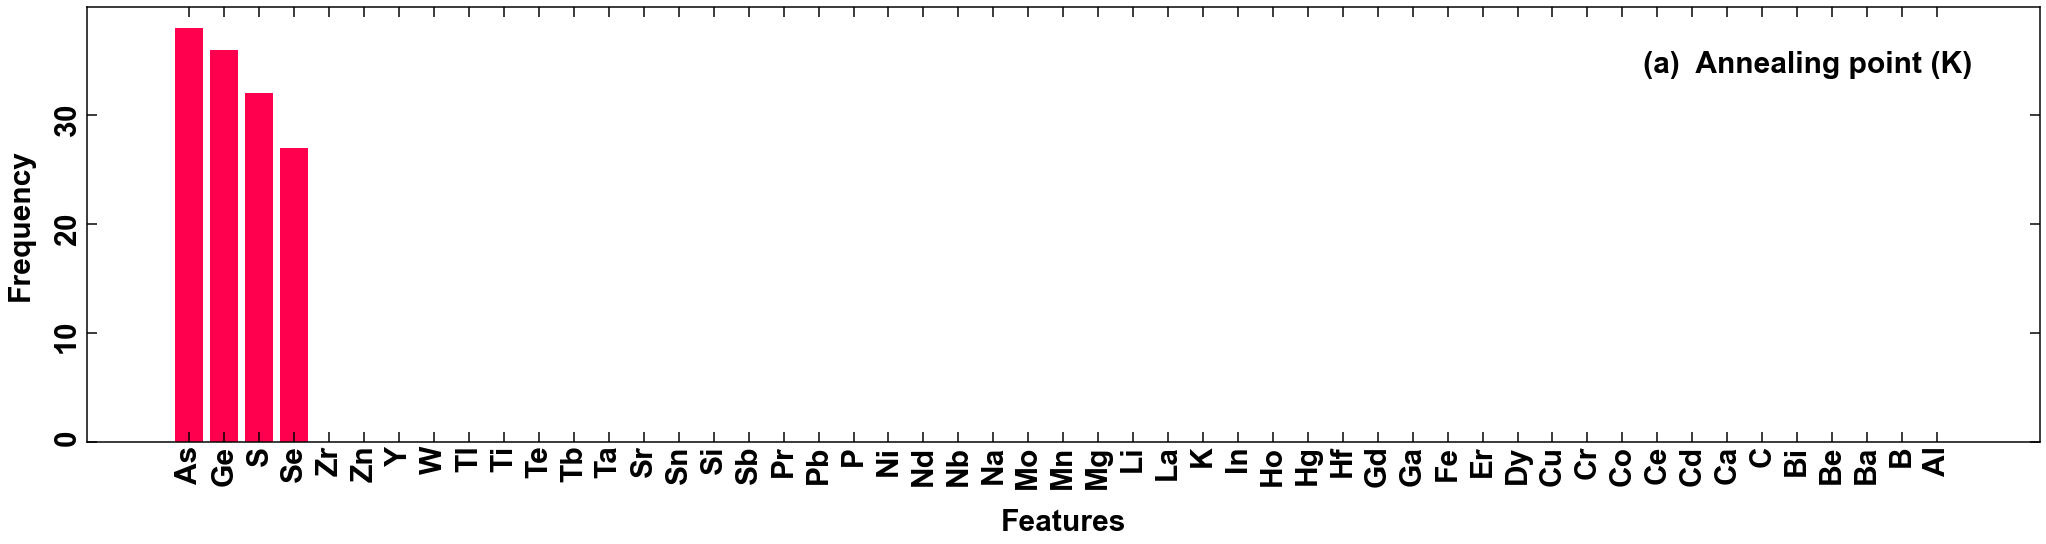

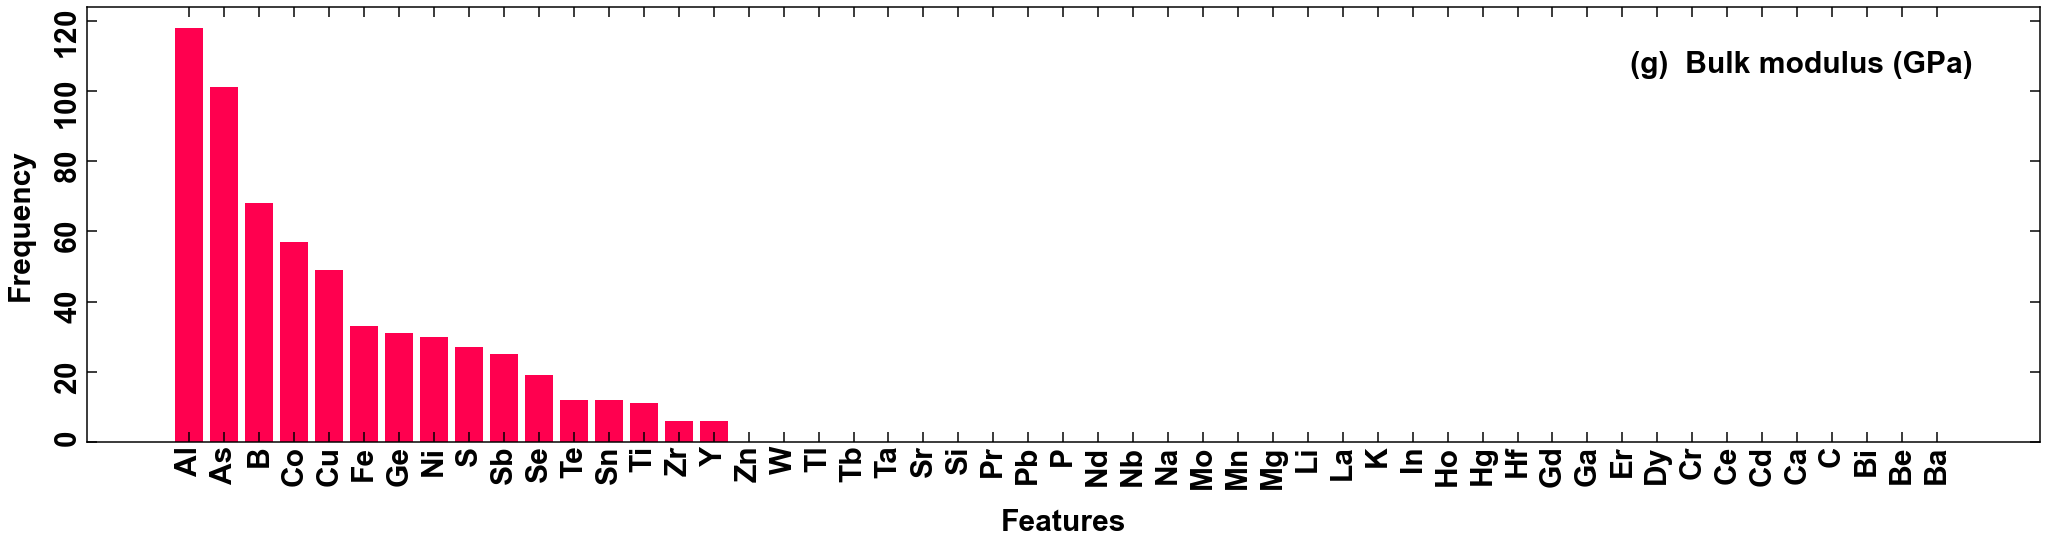

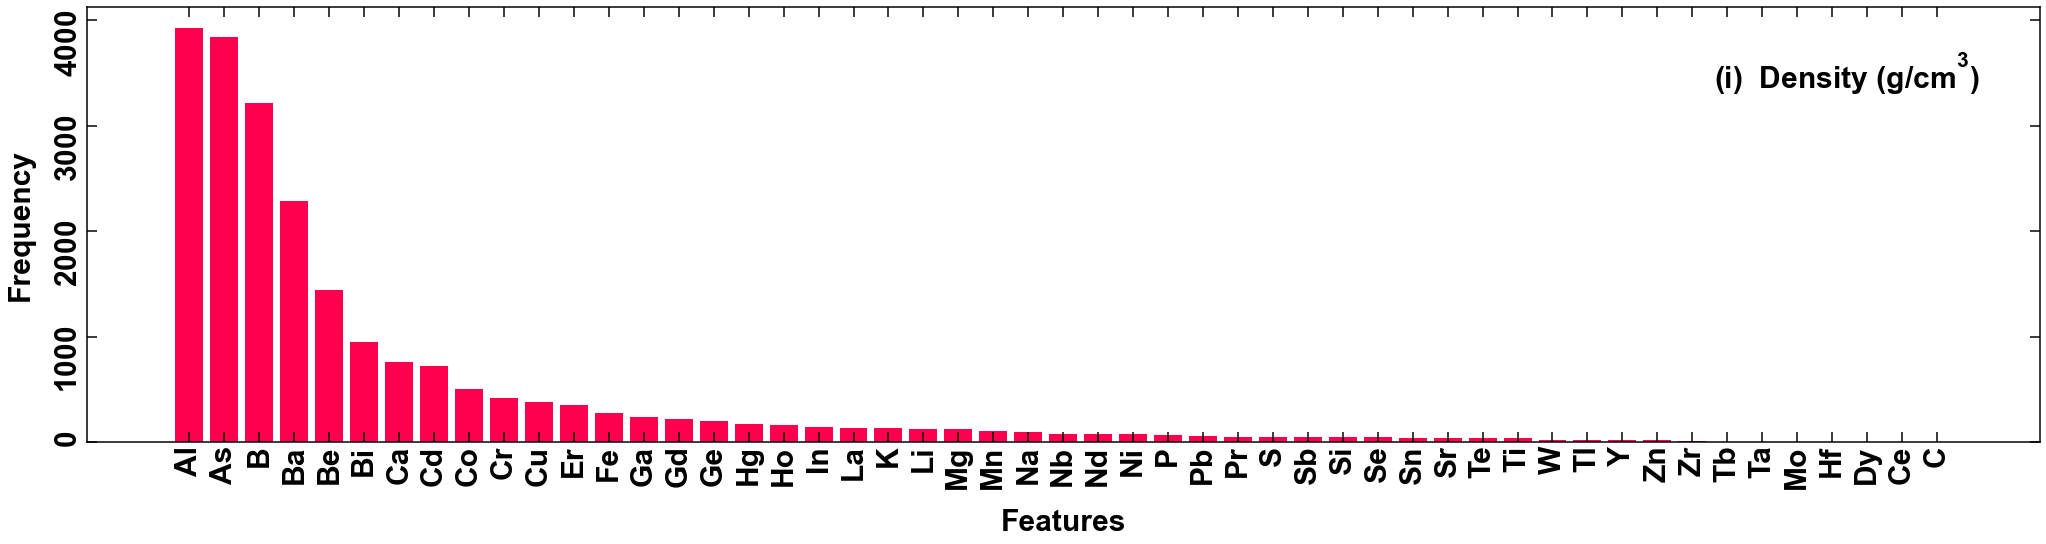

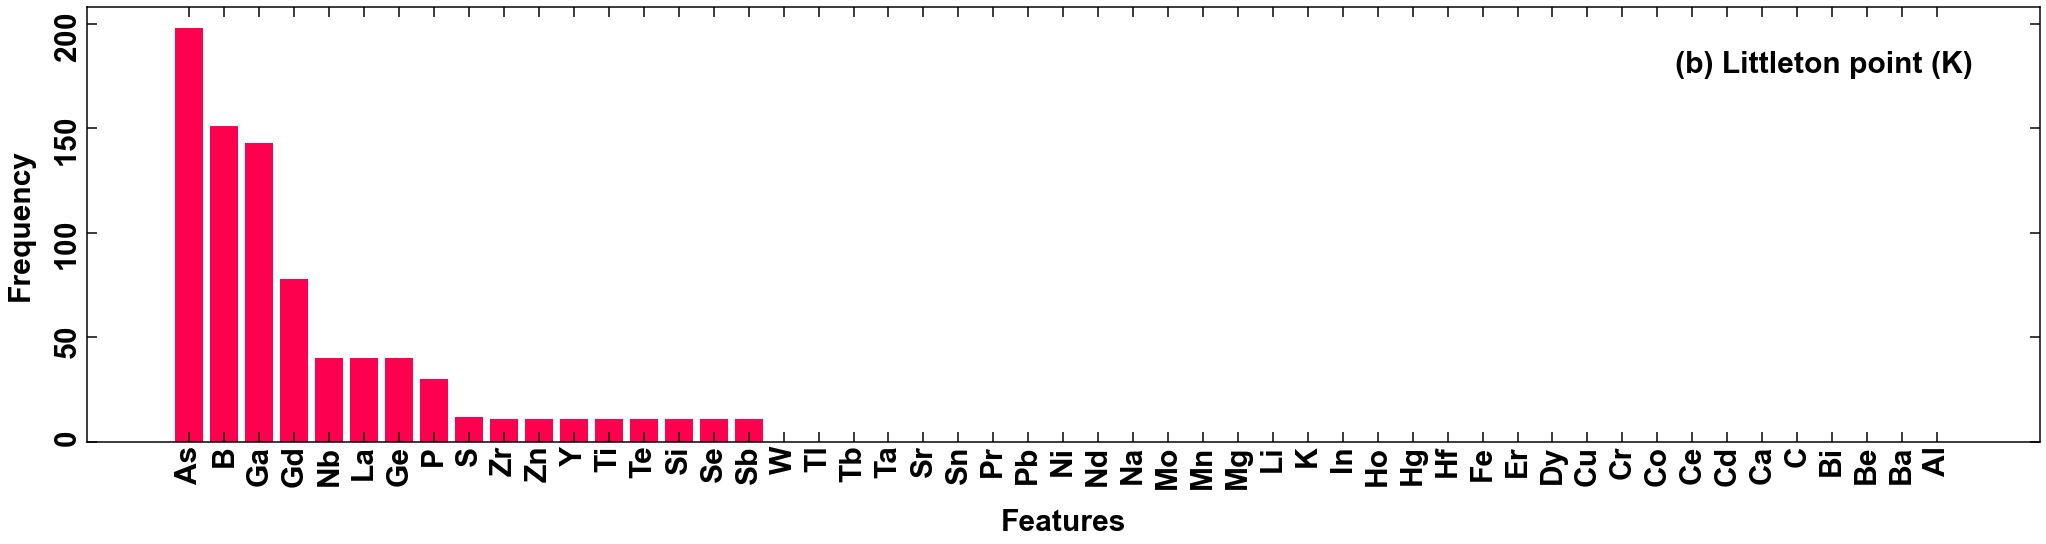

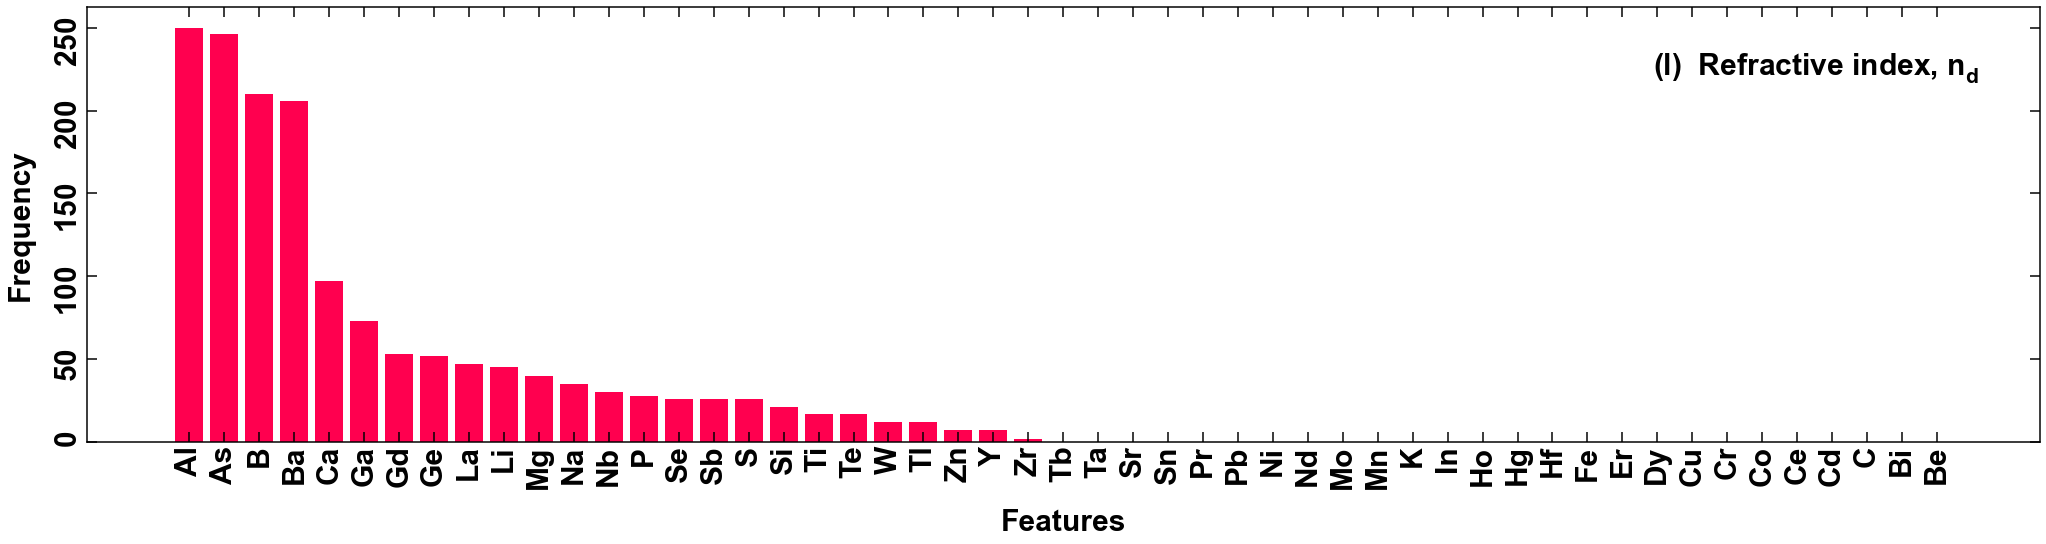

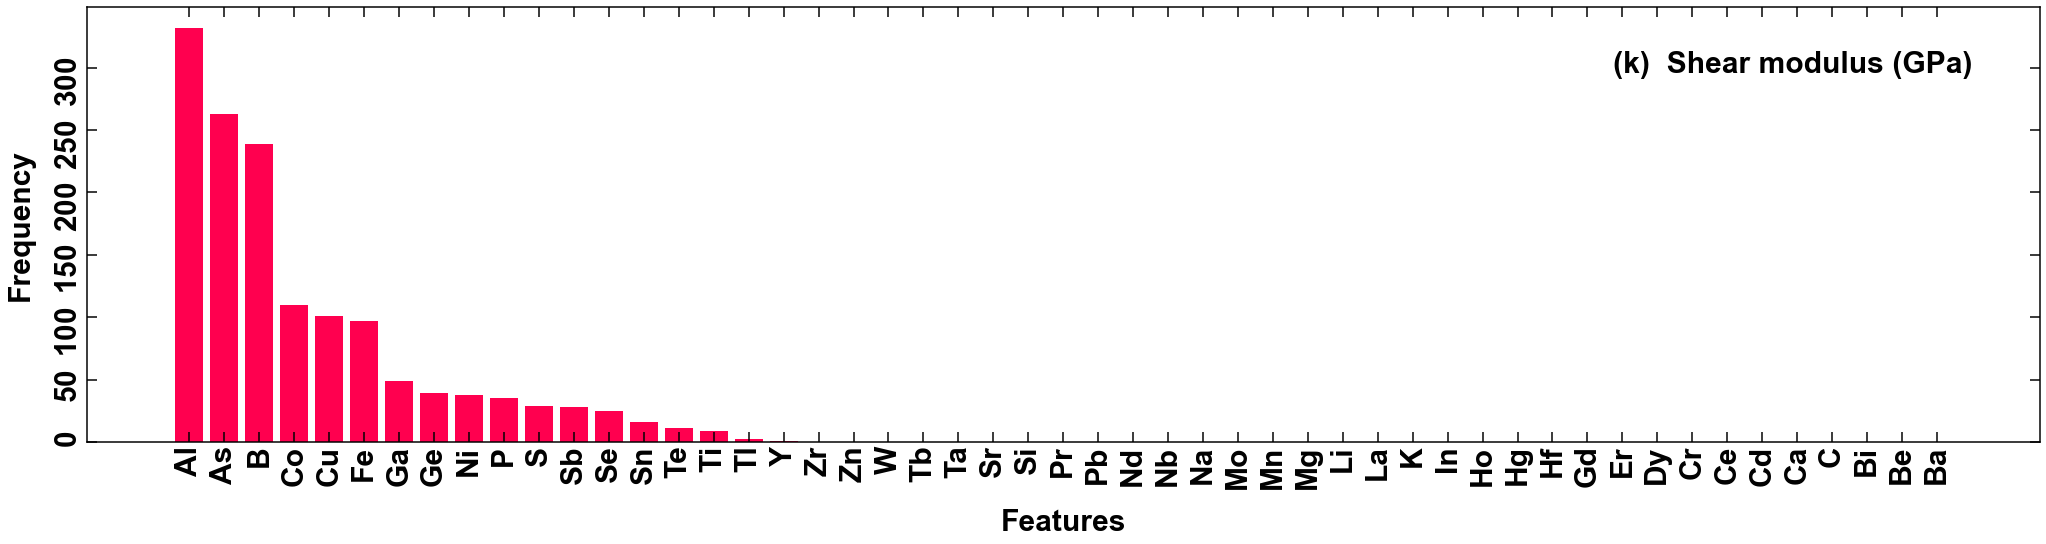

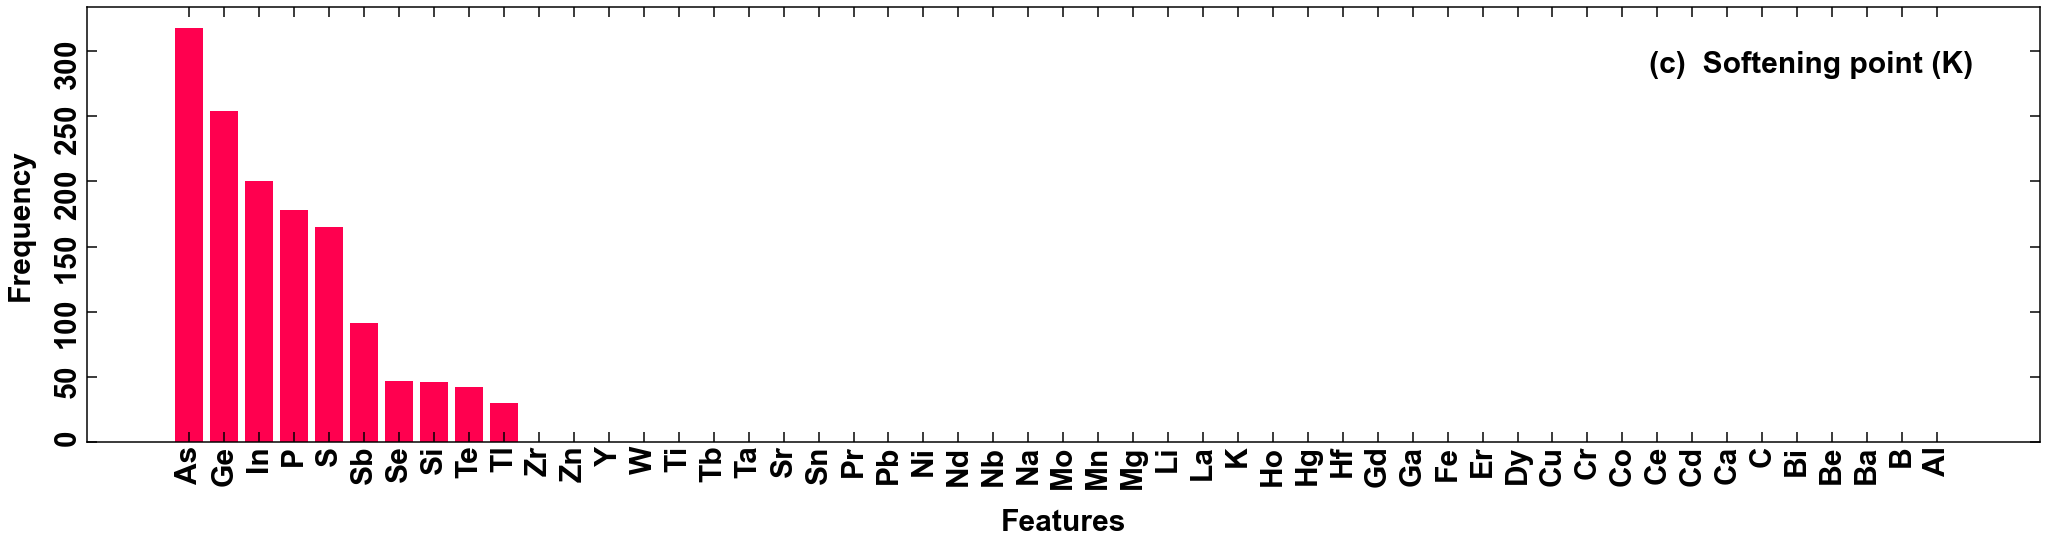

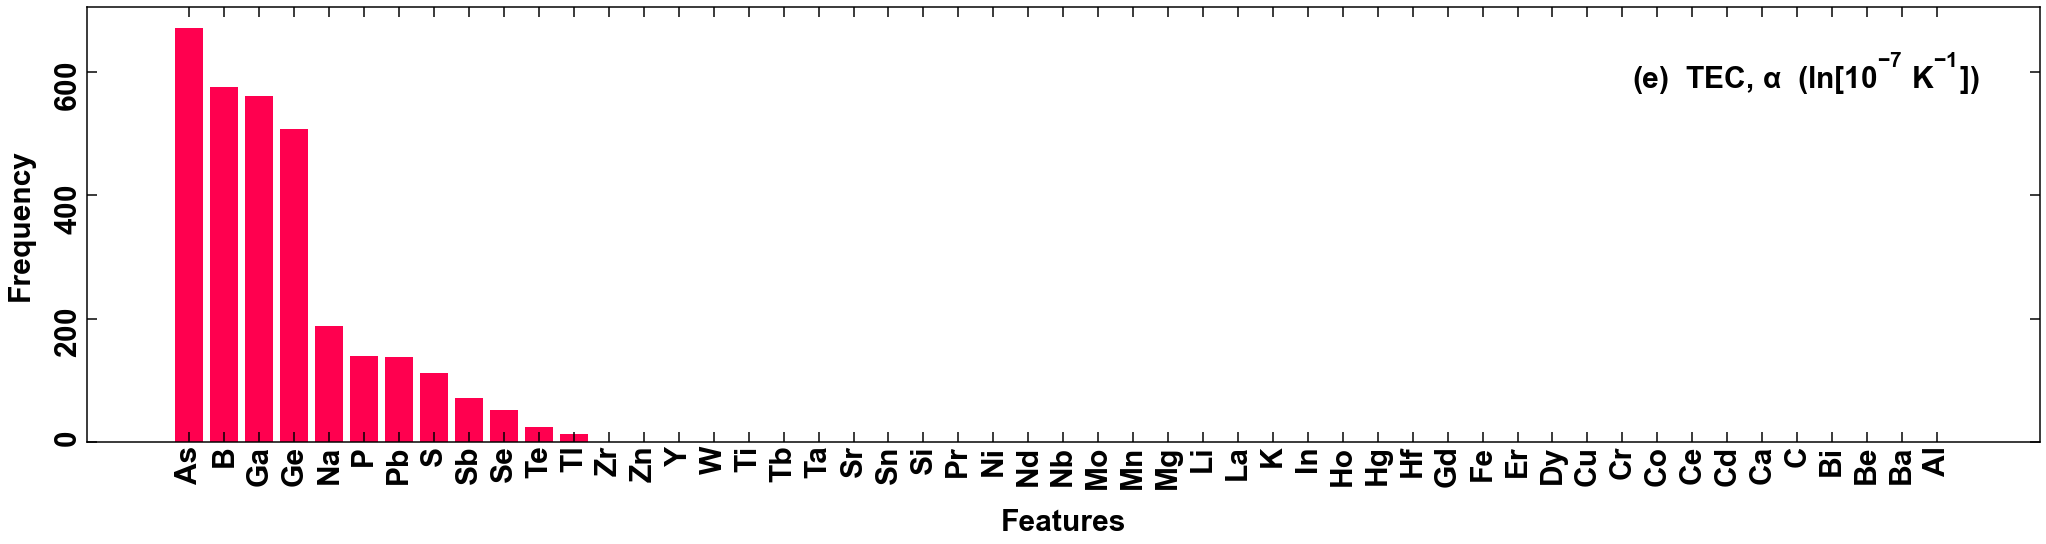

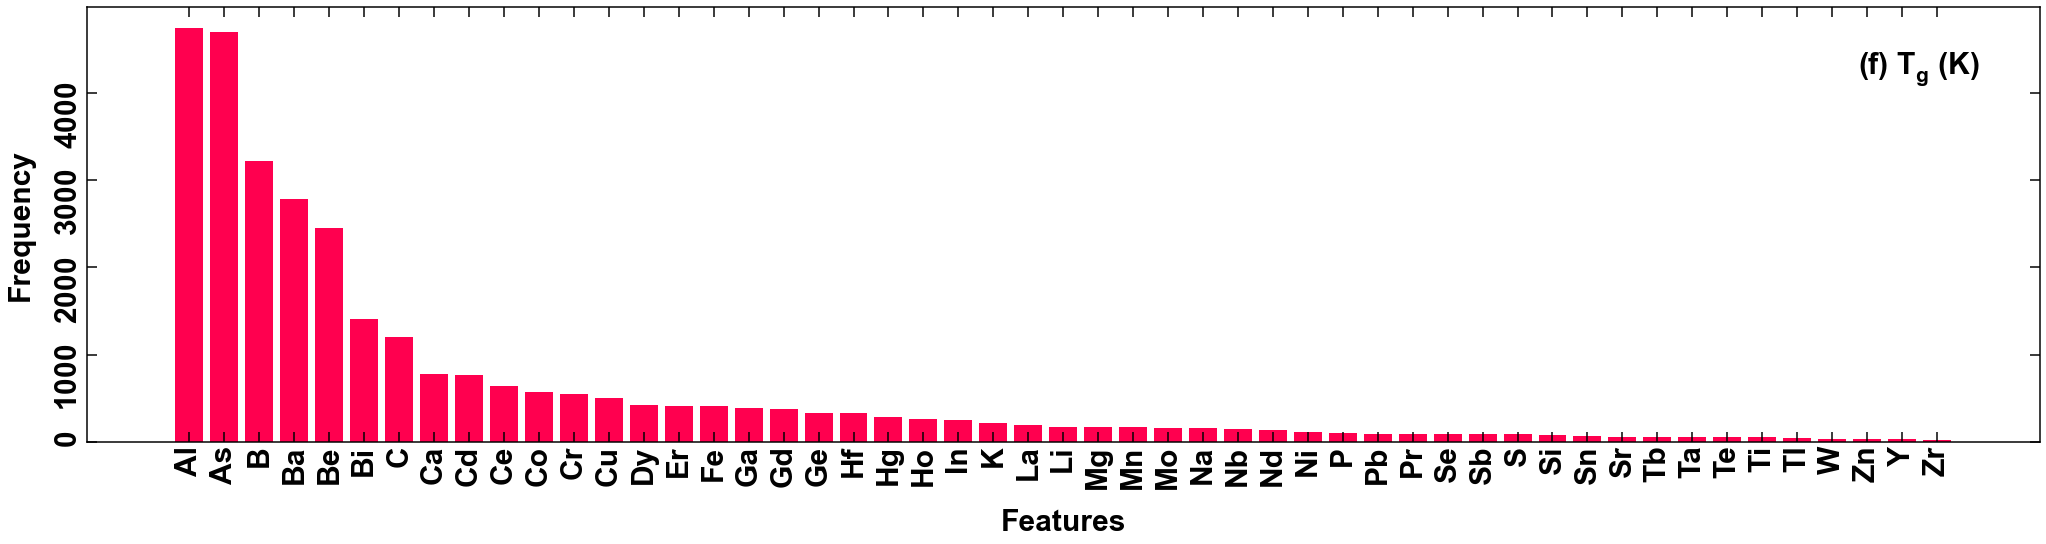

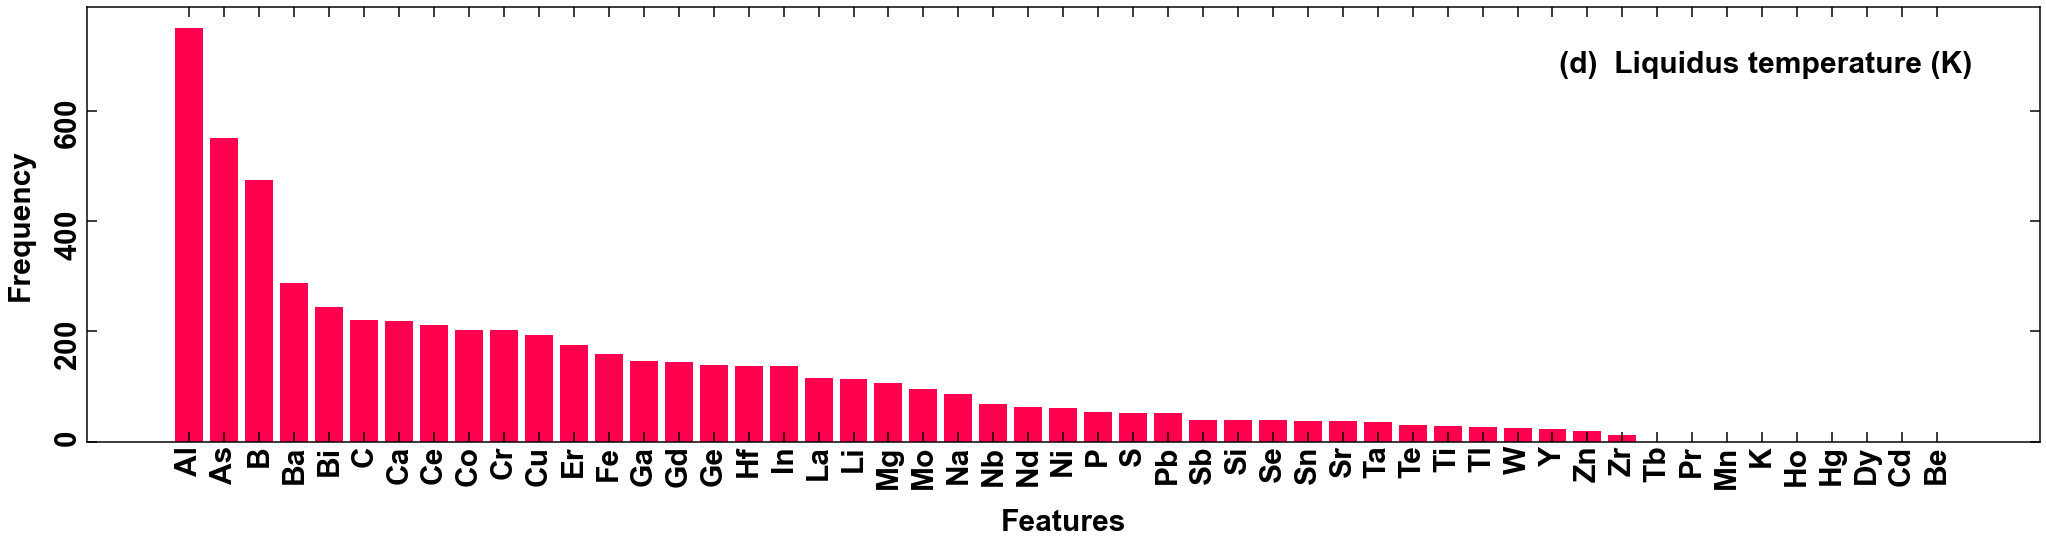

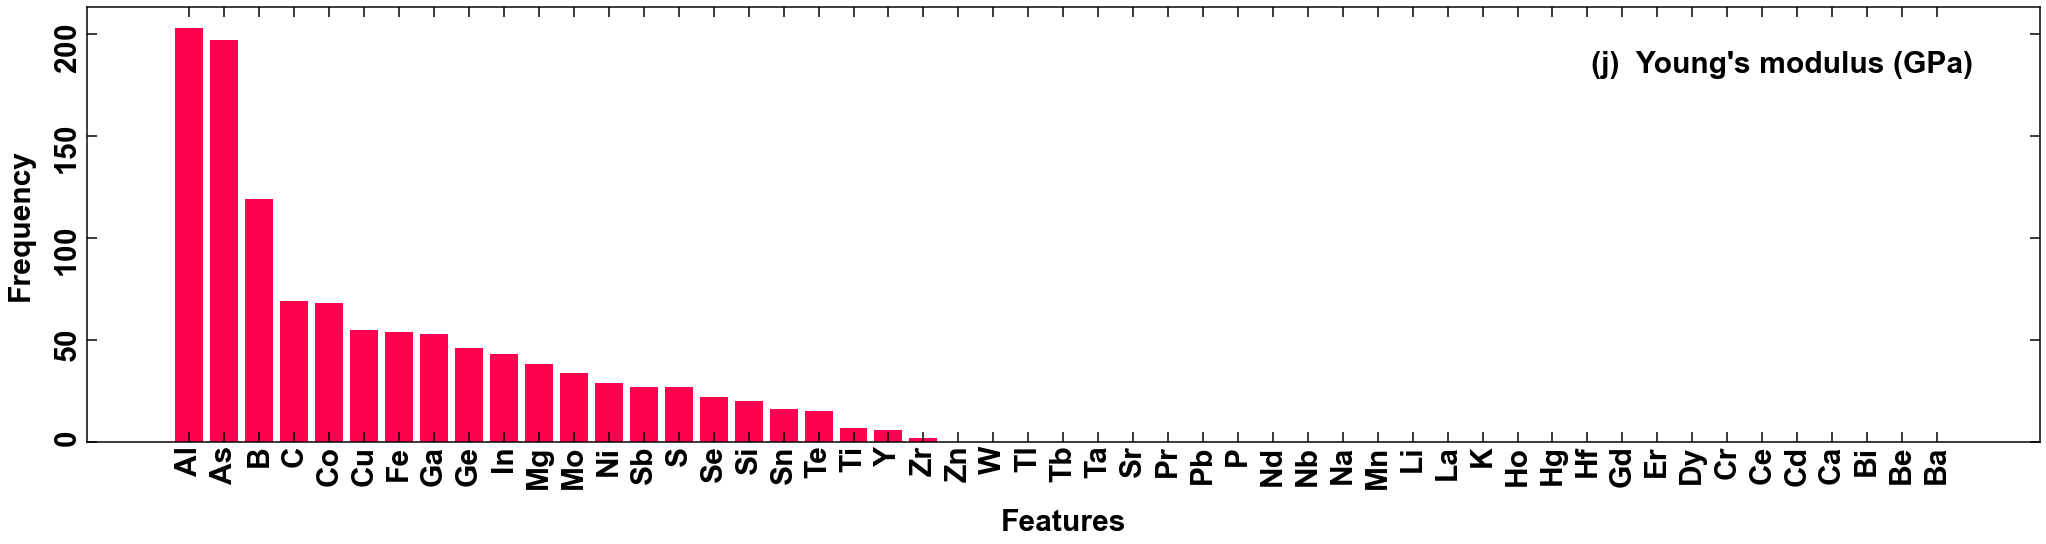

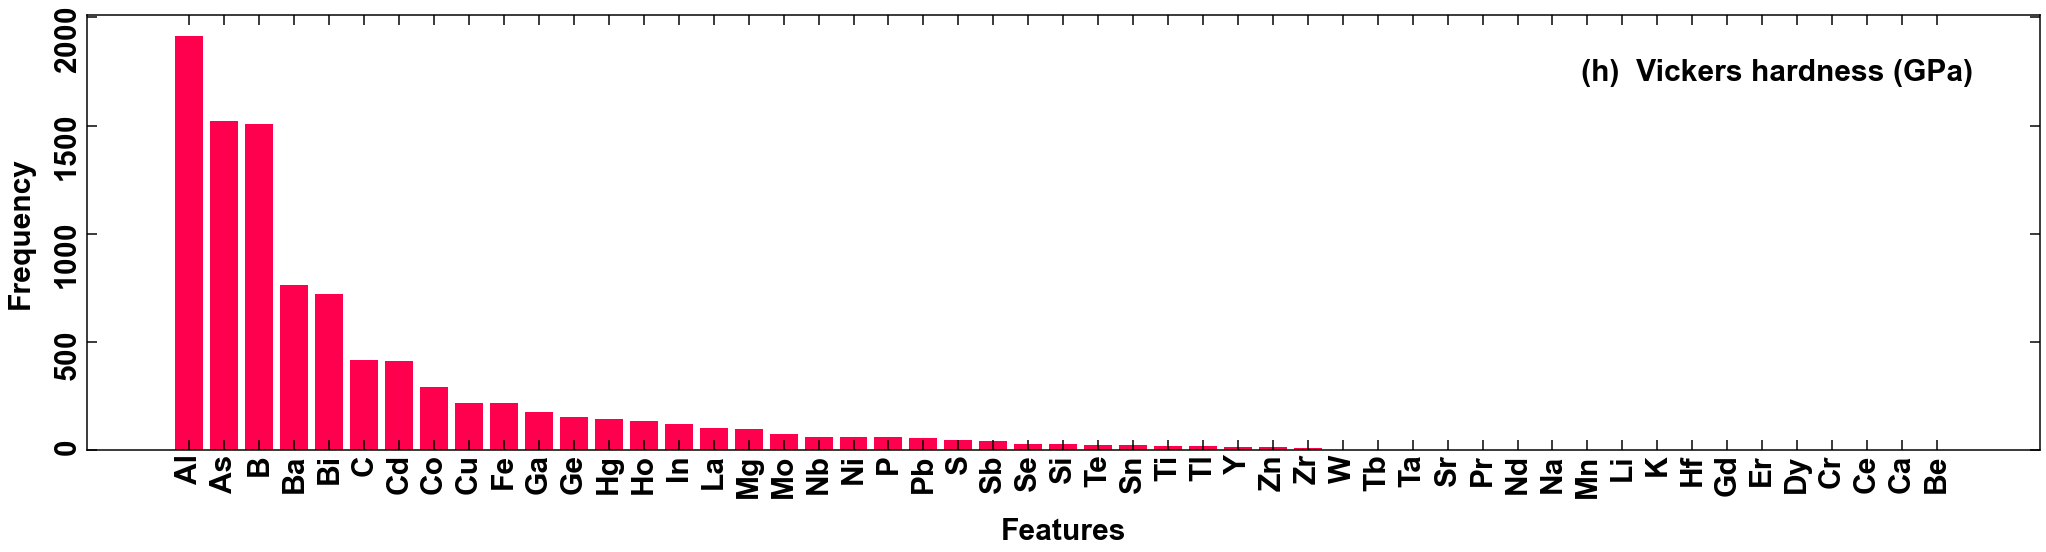

In [10]:
# b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

 
path = r'new_data/'

for prop in b: 
    
    
    
    file = path + prop + '.csv'
    data = pd.read_csv(file) 
    
    col = data.columns[:-1]
    
    data = data.values
    X_features = data[:,0:-1]
    Y_properties = data[:,-1]

    mean = Y_properties.mean()
    scale = 10**int(np.log10(mean))
    Y_properties /= scale
    mean = Y_properties.mean()
    std = Y_properties.std()
    Zs = (Y_properties-mean)/std
    mask = (Zs<3) & (Zs>-3)

    X_features = X_features[mask.ravel(),:]
    Y_properties = Y_properties[mask].ravel()
    data = pd.DataFrame(X_features, columns= col)
    
    i = prop
    if i == 'annealing':
        lab = "(a)  Annealing point (K) " 

    if i == 'BulkModulus':
        lab = "(g)  Bulk modulus (GPa) "
    if i == 'Density':
        lab = "(i)  Density (g/cm$^3$) "
    if i == 'Hardness_RT' or i == 'Hardness_misc':
        lab ="(h)  Vickers hardness (GPa) "
  
    if i== 'shear_modulus':
        lab = "(k)  Shear modulus (GPa) "
    if i== 'softening':
        lab = "(c)  Softening point (K) "
    if i== 'TLiq':
        lab = "(d)  Liquidus temperature (K) "
    if i == 'Littleton':
        lab = "(b) Littleton point (K) "
    if i == 'TG':
        lab = "(f) $T_g$ (K) "
    if i== 'TEC':
        lab ="(e)  TEC, \u03B1  (ln[$10^{-7}$ $K^{-1}$]) "
    if i== 'YM':
        lab = "(j)  Young's modulus (GPa) "
    if i== 'ND':
        lab =  "(l)  Refractive index, $n_d$ "


    ff = pd.DataFrame(data.astype(bool).sum(axis=0).sort_values(ascending=False))
    ff3= ff.values.tolist()
    ff2 = [ item for elem in ff3 for item in elem]
    data_col = data.columns
    
    #print('Flat List : ', ff2)
    
    ff2 = pd.DataFrame(ff2, data_col).T
    new_data = pd.DataFrame(columns = col_global)
    new_data = new_data.append(ff2, ignore_index = True).fillna(0)
    new_data = new_data.values
    
    # print(ff1)
    # print(ff2)
    # fig, ax = plt.subplots()
    # plt.bar(ff1, ff2, color = ['indianred'])
    
    y, x = zip(*sorted(zip(new_data[0], col_global), reverse= True))
    fig, ax = plt.subplots(figsize=(35,8))
    plt.bar(x, y, color = "#FF004F", width = 0.8)
    ax.tick_params(which='both', labelsize=30, rotation=90)
    
#     plt.axes().xaxis.set_tick_params(which='minor', bottom = 'off')
    # fig=plt.gca()
    # fig.spines['top'].set_visible(True) 
    # fig.spines['right'].set_visible(True)
    # fig.spines['left'].set_visible(True)
    # visible_ticks = {
    #    "top": True,
    #    "left": True

    # }
    # plt.tick_params(axis="x", which="both", **visible_ticks)
    # plt.tick_params(axis="y", which="major", **visible_ticks)


#     for i in range(len(ff2)):
#         plt.annotate(str(ff2[i]),xy=(ff1[i],ff2[i]),ha='center', va='bottom')
    plt.annotate(lab, xy=(0.97, 0.90),xycoords='axes fraction', fontsize=30,  horizontalalignment='right', verticalalignment='top')
 
    plt.xlabel('Features' , fontsize=30 , labelpad=20)
    plt.ylabel('Frequency' , fontsize=30, labelpad=20)
    plt.minorticks_off()
#     pad_inch = 0
#     plt.xticks(rotation = 45)
#     plt.savefig("element_freq/" + prop + ".png" , dpi = 300)
#     plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.show()

    

# Component vs Frequency 

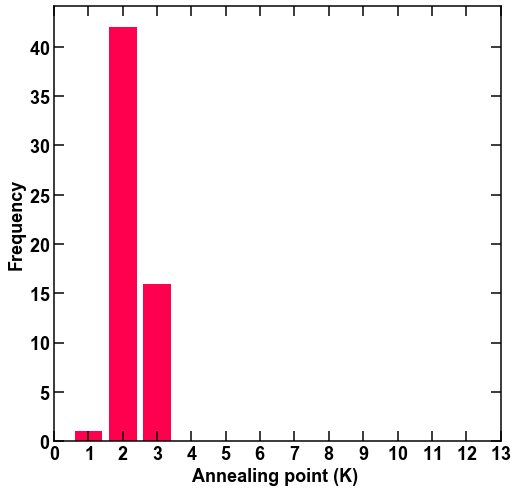

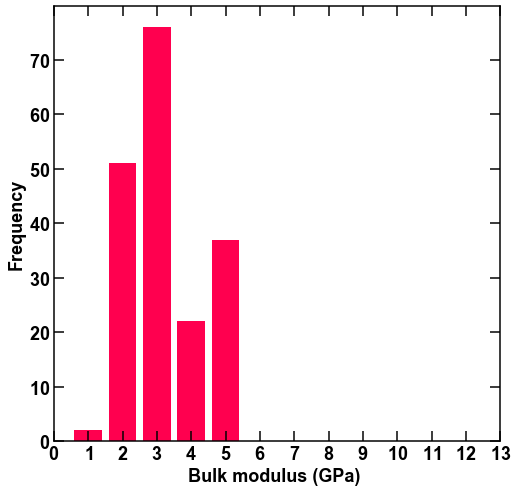

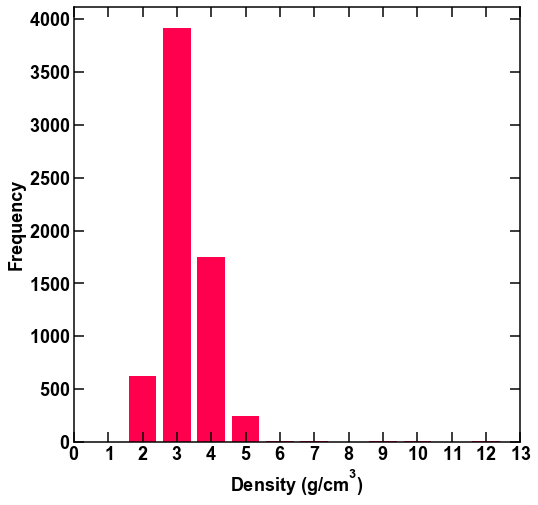

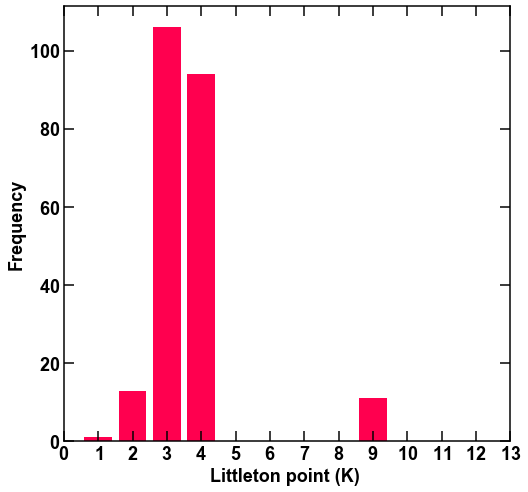

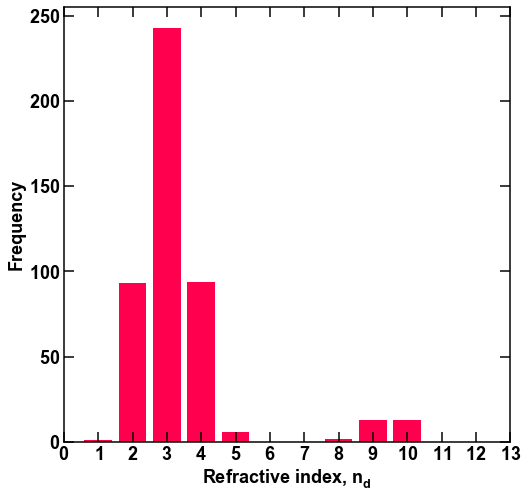

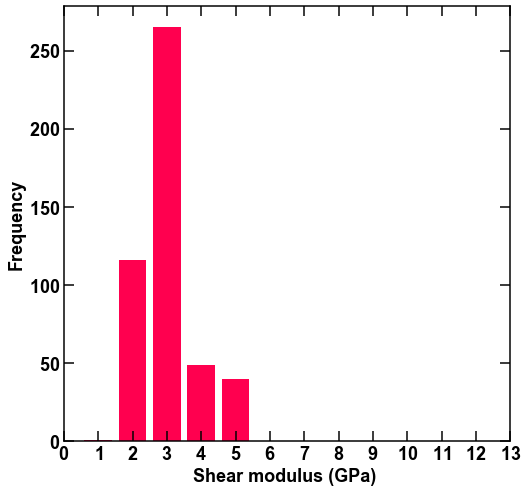

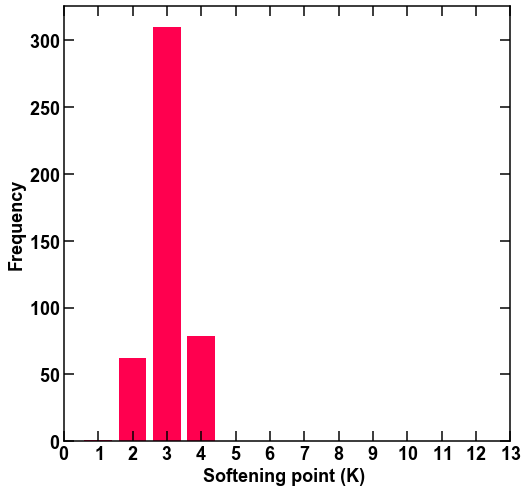

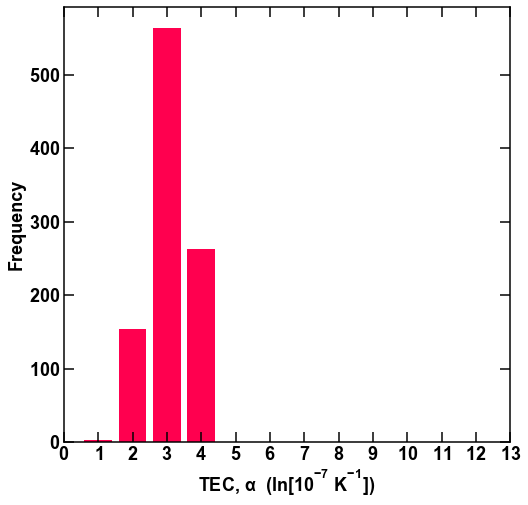

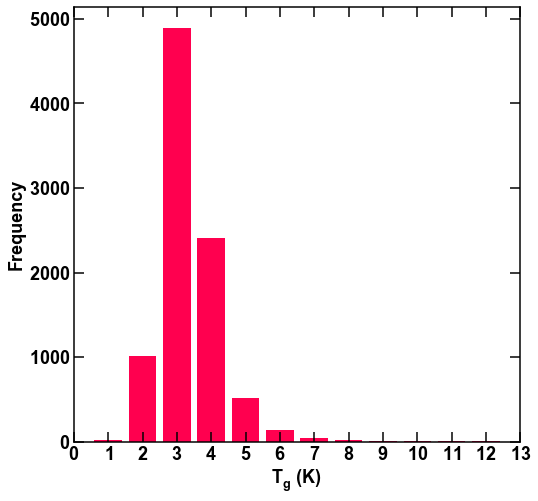

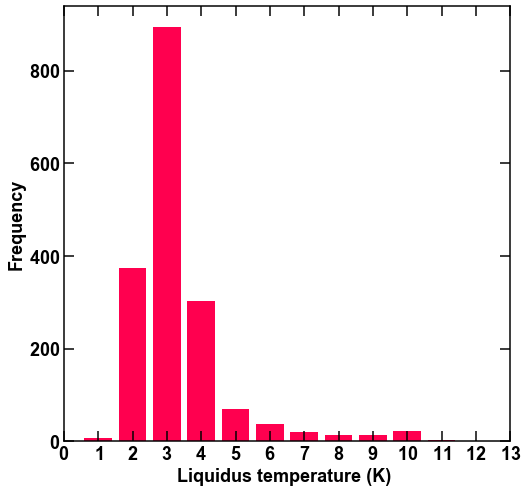

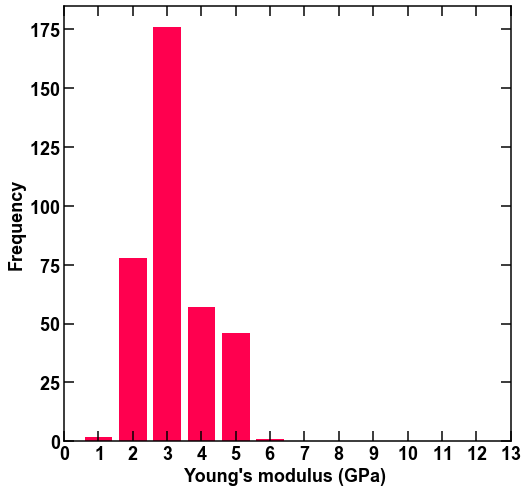

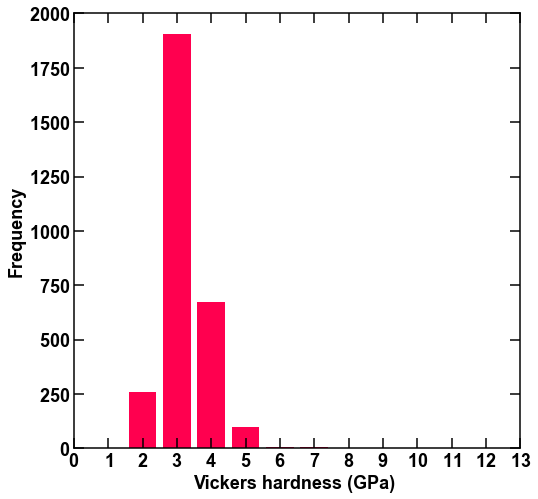

In [11]:
b = ['annealing', 'BulkModulus','Density','Littleton','ND' ,'shear_modulus','softening','TEC','TG','TLiq','YM','Hardness_RT']

 
path = r'new_data/'

for prop in b:
    
    
    
    file = path + prop + '.csv'
    data = pd.read_csv(file) 
    
    col = data.columns[:-1]
    data = data.values
    X_features = data[:,0:-1]
    Y_properties = data[:,-1]

    mean = Y_properties.mean()
    scale = 10**int(np.log10(mean))
    Y_properties /= scale
    mean = Y_properties.mean()
    std = Y_properties.std()
    Zs = (Y_properties-mean)/std
    mask = (Zs<3) & (Zs>-3)

    X_features = X_features[mask.ravel(),:]
    Y_properties = Y_properties[mask].ravel()
    data = pd.DataFrame(X_features, columns= col)
    
    i = prop
    if i == 'annealing':
        lab = "Annealing point (K) " 

    if i == 'BulkModulus':
        lab = "Bulk modulus (GPa) "
    if i == 'Density':
        lab = "Density (g/cm$^3$) "
    if i == 'Hardness_RT' or i == 'Hardness_misc':
        lab ="Vickers hardness (GPa) "
  
    if i== 'shear_modulus':
        lab = "Shear modulus (GPa) "
    if i== 'softening':
        lab = "Softening point (K) "
    if i== 'TLiq':
        lab = "Liquidus temperature (K) "
    if i == 'Littleton':
        lab = "Littleton point (K) "
    if i == 'TG':
        lab = "$T_g$ (K) "
    if i== 'TEC':
        lab ="TEC, \u03B1  (ln[$10^{-7}$ $K^{-1}$]) "
    if i== 'YM':
        lab = "Young's modulus (GPa) "
    if i== 'ND':
        lab =  "Refractive index, $n_d$ "


    zz = pd.DataFrame(data.astype(bool).sum(axis=1).value_counts())
    zz3= zz.values.tolist()
    zz2 = [ i for e in zz3 for i in e]

    zz1 = []
    for i in range(zz.shape[0]):
        zz1.append(zz.index[i])


    
    plt.figure(figsize=(8,8))
    plt.bar(zz1, zz2, color = "#FF004F")
    plt.xticks(ticks=np.arange(0,14))
#     for i in range(len(zz2)):
#         plt.annotate(str(zz2[i]),xy=(zz1[i],zz2[i]),ha='center', va='bottom')
    plt.xlabel(lab, fontsize = 18)
    plt.ylabel('Frequency',fontsize = 18)
    plt.minorticks_off()
#     plt.savefig("component_freq/" + prop + ".png", dpi=300)
    plt.show()
   
    #plt.savefig('no_glasses.png')
    